In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
#! pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_Diabetes = pd.read_csv('C:/Users/mekon/Desktop/Purdue DS_training/Capstone Projects/Healthcare PGP/Data/health care diabetes.csv')

In [3]:
data_Diabetes.shape

(768, 9)

In [4]:
data_Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data_Diabetes.shape

(768, 9)

#### The datsset has 768 observations and 9 variables. The values of BMI and DiabetesPedigreeFunction are floats whereas the the values of all variable are intergers.

In [6]:
data_Diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data_Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# d_type = data_Diabetes.dtypes.value_counts()
# for i in d_type.index:
#     print('The number of', i, 'object is', d_type)[i]

In [9]:
# plt.bar(d_type.index, d_type[i])

In [10]:
data_Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Using the above code I tried to see if any of the variables have missing values. But all the variables have non-missing values. However the following 5 variables have 0 values which doesn't make sense. Later we'll replace zeros with missing values and treat them accordingly. First let us create the new list for describe them.

In [11]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [12]:
data_Diabetes[columns].describe().round(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.00,768.00,768.00,768.00,768.00
mean,120.89,69.11,20.54,79.80,31.99
std,31.97,19.36,15.95,115.24,7.88
min,0.00,0.00,0.00,0.00,0.00
25%,99.00,62.00,0.00,0.00,27.30
50%,117.00,72.00,23.00,30.50,32.00
75%,140.25,80.00,32.00,127.25,36.60
max,199.00,122.00,99.00,846.00,67.10


In [13]:
# The value of 0 in the columns listed above doesn't make sense; should be repalced by missing values
# First let's check number of zeroes in each of the columns
for cols in columns:
    print('Number of zeros in', cols, 'is',(data_Diabetes[cols] ==0).sum())

Number of zeros in Glucose is 5
Number of zeros in BloodPressure is 35
Number of zeros in SkinThickness is 227
Number of zeros in Insulin is 374
Number of zeros in BMI is 11


In [14]:
# Now let's replace those zeros with missing values
for cols in columns:
    data_Diabetes[cols]=np.where(data_Diabetes[cols] == 0, np.NaN, data_Diabetes[cols].values)

In [15]:
# Check the number of missing values in the columns is equal to the original zeroes
data_Diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### As we can see from the above output the the 0's in the 5 variables listed above is converted to missing values. where Insulin and Glucose have the highest (374) and  the lowest (5) missing values, respectively. Here I used lambda function to replace the missing values for each column by median. 

In [16]:
data_Diabetes=data_Diabetes.apply(lambda x : x.fillna(x.median()), axis = 0)

#### Here the missing values were treated accordingly. The description analysis for those clumns indicate no zeros as minimum values.

In [17]:
data_Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
data_Diabetes[columns].describe().round(2)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.00,768.00,768.00,768.00,768.00
mean,121.66,72.39,29.11,140.67,32.46
std,30.44,12.10,8.79,86.38,6.88
min,44.00,24.00,7.00,14.00,18.20
25%,99.75,64.00,25.00,121.50,27.50
50%,117.00,72.00,29.00,125.00,32.30
75%,140.25,80.00,32.00,127.25,36.60
max,199.00,122.00,99.00,846.00,67.10


In [19]:
pd.options.display.max_rows = None
data_Diabetes['Insulin'].value_counts()

125.0    378
105.0     11
130.0      9
140.0      9
120.0      8
94.0       7
180.0      7
100.0      7
135.0      6
115.0      6
110.0      6
66.0       5
56.0       5
49.0       5
76.0       5
210.0      5
54.0       4
160.0      4
190.0      4
168.0      4
88.0       4
200.0      4
165.0      4
64.0       4
155.0      4
71.0       4
90.0       4
92.0       3
74.0       3
75.0       3
145.0      3
50.0       3
175.0      3
325.0      3
63.0       3
215.0      3
194.0      3
45.0       3
156.0      3
182.0      3
83.0       3
48.0       3
44.0       3
106.0      3
176.0      3
36.0       3
82.0       3
70.0       3
126.0      3
95.0       2
87.0       2
79.0       2
60.0       2
480.0      2
144.0      2
170.0      2
158.0      2
150.0      2
148.0      2
67.0       2
132.0      2
116.0      2
167.0      2
231.0      2
185.0      2
122.0      2
85.0       2
77.0       2
205.0      2
265.0      2
293.0      2
57.0       2
230.0      2
58.0       2
37.0       2
495.0      2
192.0      2

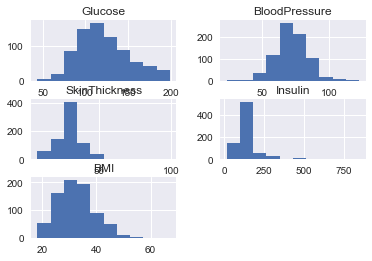

In [20]:
plt.style.use('seaborn')
data_Diabetes[['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']].hist()
plt.show()

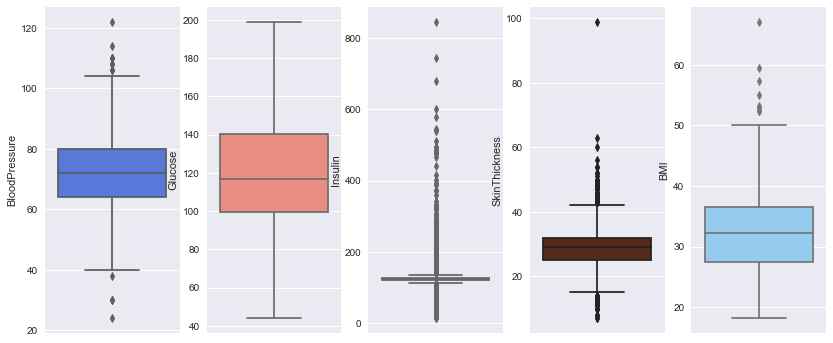

In [21]:
plt.style.use('seaborn')
fig, ax =plt.subplots(1,5,figsize=(14,6))
sns.boxplot(y=data_Diabetes['BloodPressure'], color="#436EEE", ax=ax[0])
sns.boxplot(y=data_Diabetes['Glucose'], color="#FA8072", ax=ax[1])
sns.boxplot(y=data_Diabetes['Insulin'], color="#54FF9F",ax=ax[2])
sns.boxplot(y=data_Diabetes['SkinThickness'], color="#5E2612", ax=ax[3])
sns.boxplot(y=data_Diabetes['BMI'], color="#87CEFF", ax=ax[4])
plt.show()

### As we can see from the above histograms and boxplots the dataset has some anomality in distributions with a number of oulier values. Next we have to treat the extreme values and see the distribution again.

In [22]:
# Treating outliers
def treat_outliers(data_Diabetes):
    sorted(data_Diabetes)
    Q1, Q3 = np.percentile(data_Diabetes, [25,75])
    IQR = Q3-Q1
    lower_bound = Q1- (IQR*1.5)
    upper_bound = Q3 + (IQR*1.5)
    new_values = []
    for val in data_Diabetes.values:
        if val < lower_bound:
            new_values.append(lower_bound)
        elif val > upper_bound:
            new_values.append(upper_bound)
        else:
            new_values.append(val)
    return new_values

In [23]:
data_Diabetes['BloodPressure'] = treat_outliers(data_Diabetes['BloodPressure'])
data_Diabetes['Glucose'] = treat_outliers(data_Diabetes['Glucose'])
data_Diabetes['Insulin'] = treat_outliers(data_Diabetes['Insulin'])
data_Diabetes['SkinThickness'] = treat_outliers(data_Diabetes['SkinThickness'])
data_Diabetes['BMI'] = treat_outliers(data_Diabetes['BMI'])

In [24]:
data_Diabetes.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.66,72.36,28.87,124.69,32.39,0.47,33.24,0.35
std,3.37,30.44,11.70,7.44,7.91,6.67,0.33,11.76,0.48
min,0.00,44.00,40.00,14.50,112.88,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,104.00,42.50,135.88,50.25,2.42,81.00,1.00


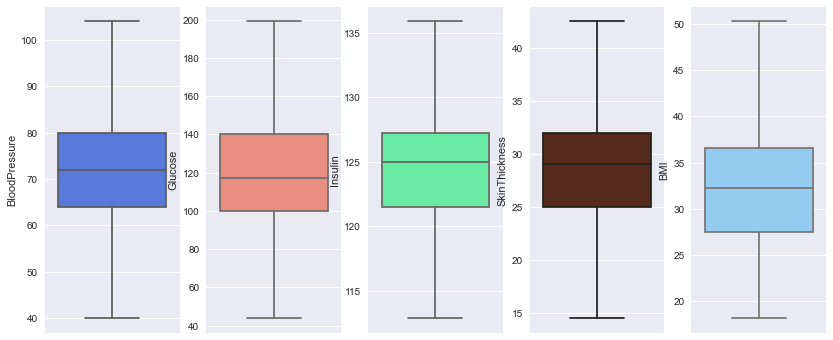

In [25]:
fig, ax =plt.subplots(1,5,figsize=(14,6))
sns.boxplot(y=data_Diabetes['BloodPressure'], color="#436EEE", ax=ax[0])
sns.boxplot(y=data_Diabetes['Glucose'], color="#FA8072", ax=ax[1])
sns.boxplot(y=data_Diabetes['Insulin'], color="#54FF9F",ax=ax[2])
sns.boxplot(y=data_Diabetes['SkinThickness'], color="#5E2612", ax=ax[3])
sns.boxplot(y=data_Diabetes['BMI'], color="#87CEFF", ax=ax[4])
plt.show()

In [26]:
D_type_counts = data_Diabetes.dtypes.value_counts()
for i in D_type_counts.index:
    print("The count of", i, "object is", D_type_counts[i])

The count of float64 object is 6
The count of int64 object is 3


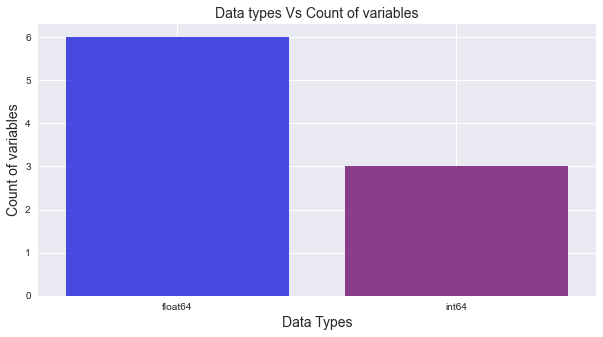

In [27]:
D_type_counts = data_Diabetes.dtypes.value_counts(sort = True)
Colors = ['blue','purple']
plt.figure(figsize=(10,5))
sns.barplot(D_type_counts.index,D_type_counts.values, alpha = 0.8, palette =  Colors)
plt.title('Data types Vs Count of variables', fontsize=14)
plt.xlabel('Data Types', fontsize=14)
plt.ylabel('Count of variables', fontsize=14)
plt.grid(True)
plt.show()

In [28]:
data_Diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

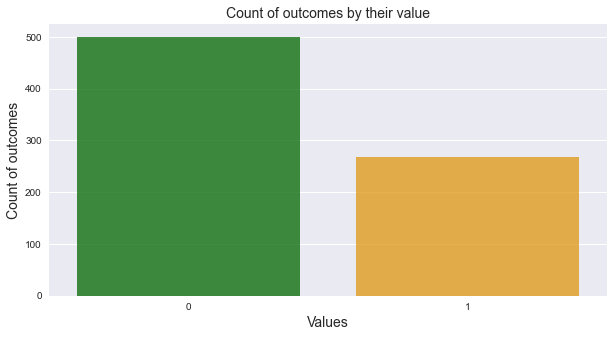

In [29]:
Outcome_balance = data_Diabetes.Outcome.value_counts(sort = True)
New_Colors = ['green', 'orange']
plt.figure(figsize=(10,5))
sns.barplot(Outcome_balance.index, Outcome_balance.values, alpha=0.8, palette = New_Colors)
plt.title('Count of outcomes by their value', fontsize=14)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Count of outcomes', fontsize=14)
plt.show()

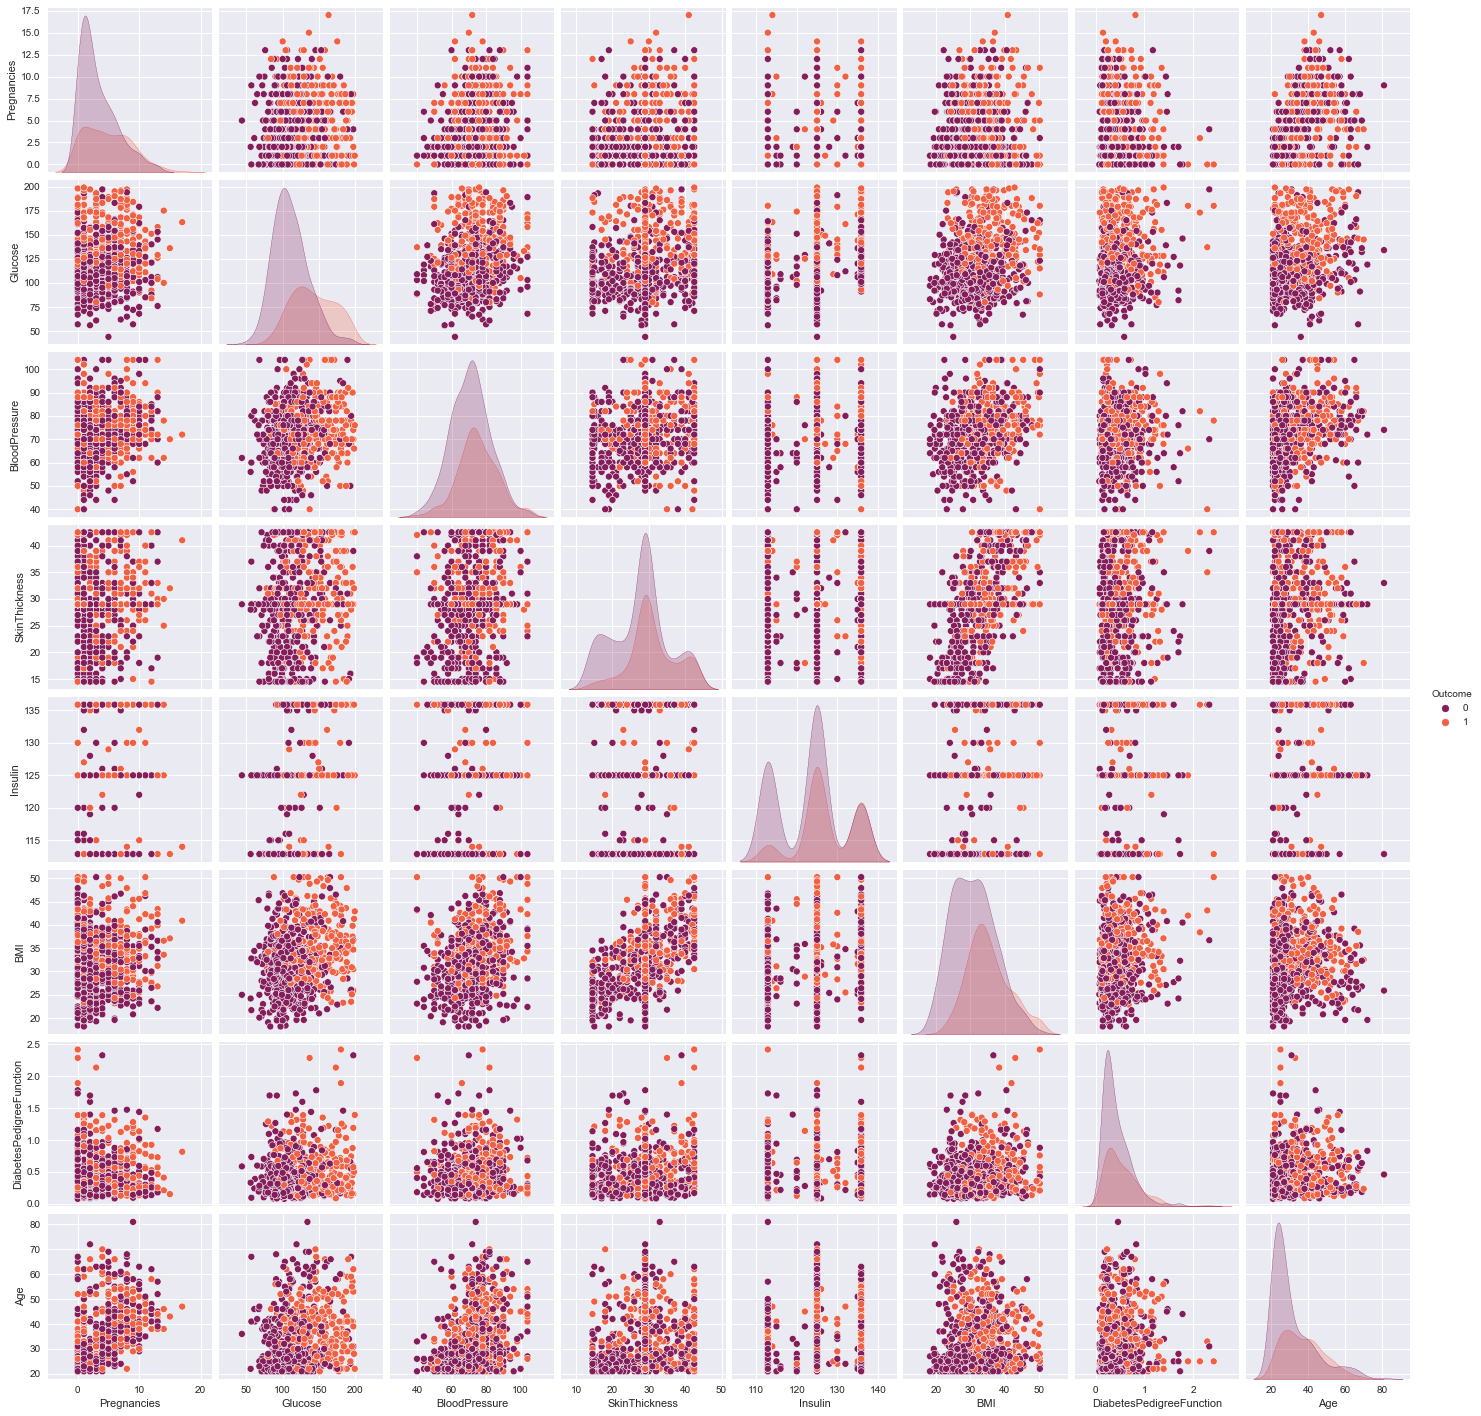

In [30]:
sns.pairplot(data_Diabetes, hue = 'Outcome', palette = 'rocket')
plt.show()

#### The pair plot above shows that patients with outcome 1 or who are diabetic are relatively older, have higher blood glucose level and BMI compared to those who are non-diabetic. For the remaining variables no apparent increase or decrease with outcome. The scatter plot clearly indicated that Insulin has no direct linear relationship with other variales in the dataset.

In [31]:
# Here we can extract features from the orginal dataset for modeling
Feature = data_Diabetes.drop(columns= "Outcome")

In [32]:
Feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21
4,0,137.0,40.0,35.0,135.875,43.1,2.288,33


In [33]:
Feature.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.209079,0.112018,0.093913,0.029249,-0.033523,0.544341
Glucose,0.128213,1.000000,0.220199,0.181371,0.413981,0.233590,0.137327,0.266909
BloodPressure,0.209079,0.220199,1.000000,0.204136,0.107028,0.286543,-0.000137,0.330245
SkinThickness,0.112018,0.181371,0.204136,1.000000,0.200742,0.559843,0.086177,0.124119
Insulin,0.093913,0.413981,0.107028,0.200742,1.000000,0.184982,0.086157,0.166583
BMI,0.029249,0.233590,0.286543,0.559843,0.184982,1.000000,0.147289,0.032320
DiabetesPedigreeFunction,-0.033523,0.137327,-0.000137,0.086177,0.086157,0.147289,1.000000,0.033561
Age,0.544341,0.266909,0.330245,0.124119,0.166583,0.032320,0.033561,1.000000


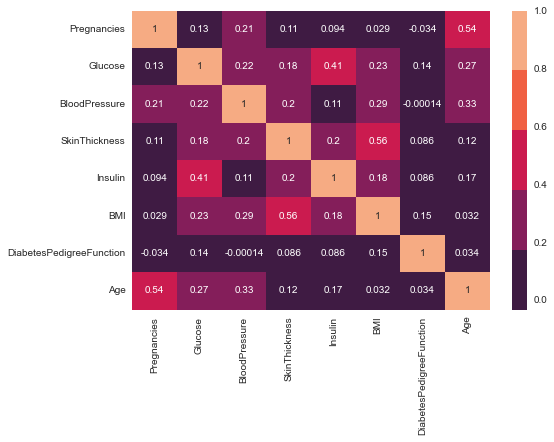

In [34]:
cmap = sns.color_palette('rocket', n_colors=5)
sns.heatmap(Feature.corr(), annot=True, cmap = cmap)
plt.show()

#### As we can see from the correlation matrix and the heatmap above almost all variables except DiabetesPedigreeFunctions are positive relationships. However the strength of the relationshiops are suboptimal

In [39]:
data_cor = Feature.corr()

In [40]:
data_cor.to_excel (r'C:\Users\mekon\Desktop\Purdue DS_training\Capstone Projects\Healthcare PGP\Analysis\Corr_matrix.xlsx', index = False, header=True)

In [35]:
Target = data_Diabetes[["Outcome"]]

In [36]:
Target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [37]:
# Convert the outcome to make it dimension for tableau dashboard
data_Diabetes['Diabetic'] = data_Diabetes['Outcome'].apply(lambda x: 'Yes' if x == 1 else 'No')
data_Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetic
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1,Yes
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0,No
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1,Yes
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0,No
4,0,137.0,40.0,35.0,135.875,43.1,2.288,33,1,Yes


In [38]:
# Export clean data to excel for tableau dashboard
#data_Diabetes.to_excel (r'C:\Users\mekon\Desktop\Purdue DS_training\Capstone Projects\Healthcare PGP\Analysis\Final_diabetes.xlsx', index = False, header=True)

#### Next we split the both the target and feature into training and test set 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size =0.25, random_state =32)

In [41]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 8) (576, 1)
(192, 8) (192, 1)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:
DM_KNN = KNeighborsClassifier()
DM_LogitReg = LogisticRegression()
DM_SVM = SVC()
DM_DecTree = DecisionTreeClassifier()
DM_RanForest = RandomForestClassifier()

In [44]:
Models = [DM_KNN,DM_LogitReg, DM_SVM, DM_DecTree,DM_RanForest]

In [45]:
for model in Models:
    model.fit(X_train, y_train)
    print('The accuracy score for', model,'using test set is:', model.score(X_test, y_test).round(3))

The accuracy score for KNeighborsClassifier() using test set is: 0.786
The accuracy score for LogisticRegression() using test set is: 0.797
The accuracy score for SVC() using test set is: 0.802
The accuracy score for DecisionTreeClassifier() using test set is: 0.724
The accuracy score for RandomForestClassifier() using test set is: 0.76


In [46]:
for model in Models:
    y_pred_model = model.predict(X_test)
    print('The prediction of', model,'is:', y_pred_model[0:10].round(3))

The prediction of KNeighborsClassifier() is: [1 1 0 0 0 0 1 0 1 0]
The prediction of LogisticRegression() is: [0 0 0 0 1 0 0 1 1 0]
The prediction of SVC() is: [1 0 0 0 0 0 0 0 1 0]
The prediction of DecisionTreeClassifier() is: [0 1 0 0 1 0 0 0 1 0]
The prediction of RandomForestClassifier() is: [0 1 0 0 0 0 1 1 1 0]


In [47]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 10, random_state = 7, shuffle=True )
for model in Models:
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("The accuracy and standard deviation of",  model,'is: %.2f%% & (%.2f%%)' % (results.mean()*100, results.std()*100),"respectively.")

The accuracy and standard deviation of KNeighborsClassifier() is: 72.91% & (6.09%) respectively.
The accuracy and standard deviation of LogisticRegression() is: 75.87% & (3.85%) respectively.
The accuracy and standard deviation of SVC() is: 73.61% & (4.51%) respectively.
The accuracy and standard deviation of DecisionTreeClassifier() is: 71.03% & (5.39%) respectively.
The accuracy and standard deviation of RandomForestClassifier() is: 76.75% & (3.42%) respectively.


#### Here I compared diffrerent with the Kneighbors classifier. As it can be seen from the above results the KNN classifier score is not the best of all the models. In fact it's only better than the decision tree claasifier, where the SVC out performs all the models.

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, recall_score

In [49]:
y_pred_knn = DM_KNN.predict(X_test)

In [50]:
# Creating the confusion matrix
Knn_cm = confusion_matrix(y_test, y_pred_knn)
# Assigning columns names
knn_cm_df = pd.DataFrame(Knn_cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
knn_cm_df

,Predicted Negative,Predicted Positive
Actual Negative,103,20
Actual Positive,21,48


In [51]:
from xgboost import XGBClassifier as XGB
DM_XGB = XGB()
DM_XGB.fit(X_train, y_train)
DM_XGB.score(X_test, y_test)

0.7604166666666666

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
DM_XGB = XGB(verbosity = 0)
params = {"criterion": ['entropy','gini'], 'max_depth':[1,2,3,10] , 'splitter': ['best', 'random']}
grid = GridSearchCV(DM_XGB,
                    params, n_jobs=1,
                    scoring="roc_auc", cv=3) 

grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
# xgb.set_config(verbosity=0)

Best: 0.822084 using {'criterion': 'entropy', 'max_depth': 1, 'splitter': 'best'}


In [54]:
DM_XGB_GR = XGB(criterion= 'entropy',max_depth= 1, splitter= 'best', verbosity = 0)

In [55]:
DM_XGB_GR.fit(X_train, y_train)
DM_XGB_GR.score(X_test, y_test)

0.8229166666666666

In [56]:
y_pred_xg = DM_XGB_GR.predict(X_test)
y_pred_xg[0:10]

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [58]:
print('The accuracy score is 1:', accuracy_score(y_pred_xg, y_test).round(3))

The accuracy score is 1: 0.823


In [59]:
print('The classification_report', classification_report(y_pred_xg, y_test))

The classification_report               precision    recall  f1-score   support

           0       0.88      0.85      0.86       127
           1       0.72      0.77      0.75        65

    accuracy                           0.82       192
   macro avg       0.80      0.81      0.81       192
weighted avg       0.83      0.82      0.82       192



In [60]:
# Creating the confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred_xg)
# Assigning columns names
xgb_cm_df = pd.DataFrame(xgb_cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
xgb_cm_df

,Predicted Negative,Predicted Positive
Actual Negative,108,15
Actual Positive,19,50


#### The confusion matrix above shows the actual number of correct classification and miss classification for the xgboosting model. Of the total positive of 69 cases,  50 of them were correctly classifed as positive while only 19 were misclassified. Similarly from over all total of 123 negative cases 108 were correctly classified as negative. 

In [61]:
KFold_KNN = KFold(n_splits = 10, random_state = 7, shuffle=True )
results = cross_val_score(DM_KNN, X_train, y_train, cv = KFold_KNN)
print("Accuracy of",  DM_KNN,'is: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

Accuracy of KNeighborsClassifier() is: 72.91% (6.09%)


In [62]:
KFold_XGB = KFold(n_splits = 10, random_state = 7, shuffle=True )
results = cross_val_score(DM_XGB_GR, X_train, y_train, cv = KFold_XGB)
print("Accuracy of",  DM_XGB_GR,'is: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='entropy', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=1,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...) is: 75.16% (3.99%)


#### As we can see from the above comparison, the kfold cross validation results for the XGB classifier with gradient boost has higher accuracy and lower standard diviation as compared to the KNN classifier. Therefore the XGB classifier is superior both when used on the original train test set and in k samples as proved in kfold crossvalidation.

In [63]:
# Now using a confusion metrics I am going to calculate the sensitivity and specificity of 
# the final chosen model which is Xgb classifier

def confusion_metrics (xgb_cm):
    pass
TP = xgb_cm[1][1]
TN = xgb_cm[0][0]
FP = xgb_cm[0][1]
FN = xgb_cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))  
# calculate mis-classification
conf_misclassification = 1- conf_accuracy    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))    
# calculate the specificity
conf_specificity = (TN / float(TN + FP))    
# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

True Positives: 50
True Negatives: 108
False Positives: 15
False Negatives: 19


In [64]:
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Mis-Classification: {round(conf_misclassification,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

--------------------------------------------------
Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.72
Specificity: 0.88
Precision: 0.88
f_1 Score: 0.79


#### As we can see from the above results the model has high specificity and low sensetivity. That means our models ability to classify diabetic patients as positive is 72% and the ability of the model to classify non-diabetic patients as negative is high (88%). out model is more specific. 

0.871038058206669 0.8259102156238953


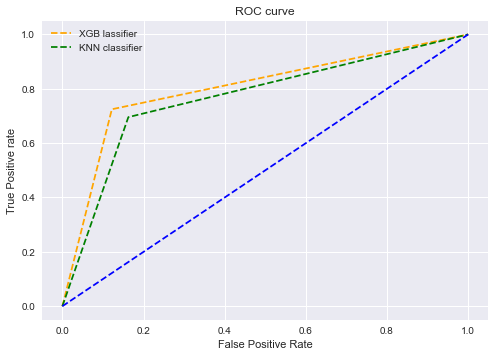

In [65]:
# Now we plot the auc curve to evalutate our models

fp_rate1, tp_rate1, threshold1 = roc_curve(y_test, y_pred_xg)
fp_rate2, tp_rate2, threshold2 = roc_curve(y_test, y_pred_knn)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
pred_prob1 = DM_XGB_GR.predict_proba(X_test)
pred_prob2 = DM_KNN.predict_proba(X_test)
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

plt.style.use('seaborn')
# plot roc curves
plt.plot(fp_rate1, tp_rate1, linestyle='--',color='orange', label='XGB lassifier')
plt.plot(fp_rate2, tp_rate2, linestyle='--',color='green', label='KNN classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

##### The ROC curve ploted above confirms that the performance of XGB model is superior as compared to the KNN classifiers. 